In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# load data
train_data = pd.read_csv(r"./train.csv")
test_data = pd.read_csv(r"./test.csv")

In [21]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [23]:
# Feature Engineering
from sklearn.preprocessing import Imputer

def nan_padding_columns(data, columns):
    for column in columns:
        print("start padding ", column)
        nan_rows = np.isnan(data[column])
        data[column][nan_rows] = data[column].mean()
        print("finish padding ", column)
    return data


nan_columns = ["Age", "SibSp", "Parch"]

train_data = nan_padding_columns(train_data, nan_columns)
print(len(train_data))
test_data = nan_padding_columns(test_data, nan_columns)
print(len(test_data))

start padding  Age
finish padding  Age
start padding  SibSp
finish padding  SibSp
start padding  Parch
finish padding  Parch
891
start padding  Age
finish padding  Age
start padding  

/Users/linxinzhe/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SibSp
finish padding  SibSp
start padding  Parch
finish padding  Parch
418


In [25]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [26]:
#save PassengerId for evaluation
test_passenger_id=test_data["PassengerId"]

In [27]:
def drop_not_concerned_columns(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket", "Fare", "Cabin", "Embarked"]
train_data = drop_not_concerned_columns(train_data, not_concerned_columns)
test_data = drop_not_concerned_columns(test_data, not_concerned_columns)

In [28]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [29]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [30]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [31]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,male,34.5,0,0,0,0,1
1,female,47.0,1,0,0,0,1
2,male,62.0,0,0,0,1,0
3,male,27.0,0,0,0,0,1
4,female,22.0,1,1,0,0,1


In [32]:
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,1,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,1,0,0
4,0,1,35.0,0,0,0,0,1


In [33]:
from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.271174,1,0,0,0,1
1,1,0,0.472229,1,0,1,0,0
2,1,0,0.321438,0,0,0,0,1
3,1,0,0.434531,1,0,1,0,0
4,0,1,0.434531,0,0,0,0,1


In [34]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("train_y content:{}".format(train_y[:3]))

print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))

train_x:(712, 7)
train_y:(712, 1)
train_y content:[[1]
 [0]
 [1]]
valid_x:(179, 7)
valid_y:(179, 1)


In [35]:
# Build Neural Network
from collections import namedtuple

def build_neural_network(hidden_units=5):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)

    fc = tf.layers.dense(inputs, hidden_units, activation=tf.nn.relu)
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

In [39]:
epochs = 9000
train_print = 250
valid_print = 500
learning_rate_value = 0.0001

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for e in range(epochs):
        feed = {model.inputs: train_x,
                model.labels: train_y,
                model.learning_rate: learning_rate_value}

        train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
        if e % train_print == 0:
            print("Epoch: {}/{}".format(e + 1, epochs),
                  "Training Loss: {:.5f}".format(train_loss),
                  "Training Acc: {:.5f}".format(train_acc))
            x_collect.append(e)
            train_loss_collect.append(train_loss)
            train_acc_collect.append(train_acc)

            feed = {model.inputs: valid_x,
                    model.labels: valid_y}
            val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
            print("Epoch: {}/{}".format(e + 1, epochs),
                  "Validation Loss: {:.4f}".format(val_loss),
                  "Validation Acc: {:.4f}".format(val_acc))
            valid_loss_collect.append(val_loss)
            valid_acc_collect.append(val_acc)

    saver.save(sess, "./titanic.ckpt")

Epoch: 1/9000 Training Loss: 0.63274 Training Acc: 0.62219
Epoch: 1/9000 Validation Loss: 0.6628 Validation Acc: 0.5922
Epoch: 251/9000 Training Loss: 0.61962 Training Acc: 0.62219
Epoch: 251/9000 Validation Loss: 0.6549 Validation Acc: 0.6034
Epoch: 501/9000 Training Loss: 0.60720 Training Acc: 0.62921
Epoch: 501/9000 Validation Loss: 0.6461 Validation Acc: 0.6034
Epoch: 751/9000 Training Loss: 0.59338 Training Acc: 0.64888
Epoch: 751/9000 Validation Loss: 0.6357 Validation Acc: 0.6201
Epoch: 1001/9000 Training Loss: 0.57957 Training Acc: 0.72051
Epoch: 1001/9000 Validation Loss: 0.6262 Validation Acc: 0.6760
Epoch: 1251/9000 Training Loss: 0.56652 Training Acc: 0.74298
Epoch: 1251/9000 Validation Loss: 0.6178 Validation Acc: 0.6872
Epoch: 1501/9000 Training Loss: 0.55357 Training Acc: 0.75140
Epoch: 1501/9000 Validation Loss: 0.6097 Validation Acc: 0.7151
Epoch: 1751/9000 Training Loss: 0.54022 Training Acc: 0.78792
Epoch: 1751/9000 Validation Loss: 0.6016 Validation Acc: 0.7542
Epoc

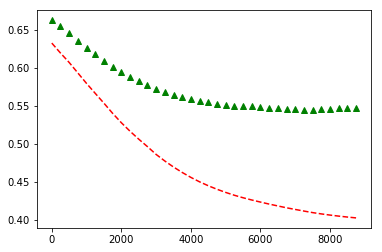

In [40]:
plt.plot(x_collect, train_loss_collect, "r--")
plt.plot(x_collect, valid_loss_collect, "g^")
plt.show()

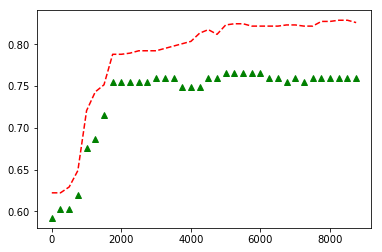

In [42]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()

In [43]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"./titanic.ckpt")
    feed={
        model.inputs:test_data
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
test_predict

array([[ 0.06499632],
       [ 0.4562448 ],
       [ 0.07930326],
       [ 0.07969794],
       [ 0.60067898],
       [ 0.1124917 ],
       [ 0.62514174],
       [ 0.27792904],
       [ 0.70329726],
       [ 0.08271873],
       [ 0.07294209],
       [ 0.33120194],
       [ 0.95749325],
       [ 0.06983683],
       [ 0.93606132],
       [ 0.83192801],
       [ 0.15466629],
       [ 0.09358315],
       [ 0.62987387],
       [ 0.51796919],
       [ 0.3551566 ],
       [ 0.20282254],
       [ 0.91150987],
       [ 0.51530433],
       [ 0.79783499],
       [ 0.03961779],
       [ 0.92636281],
       [ 0.08992088],
       [ 0.34715524],
       [ 0.06430399],
       [ 0.09900948],
       [ 0.18033218],
       [ 0.41538498],
       [ 0.44011465],
       [ 0.53396994],
       [ 0.09998463],
       [ 0.62326813],
       [ 0.68463254],
       [ 0.08410351],
       [ 0.07294209],
       [ 0.09554011],
       [ 0.38252661],
       [ 0.05433705],
       [ 0.81625891],
       [ 0.93948036],
       [ 0

In [44]:
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)
test_predict_result=binarizer.fit_transform(test_predict)
test_predict_result=test_predict_result.astype(np.int32)
test_predict_result

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [45]:
passenger_id=test_passenger_id.copy()
evaluation=passenger_id.to_frame()
evaluation["Survived"]=test_predict_result
evaluation

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [46]:
evaluation.to_csv("evaluation_submission.csv",index=False)